# Cleaning Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
crash = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", na_values = ["Unspecified"])
pd.set_option('display.max_columns', None)
crash.head()

/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/06/2020,6:56,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,04/28/2020,17:35,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,03/18/2020,14:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,05/07/2020,22:14,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,03/06/2020,17:16,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [3]:
new_columns = ["date","time","borough","zipcode", "latitude", "longitude", "location", "on_street", "cross_street", "off_street", "num_persons_injured", "num_persons_killed", "num_ped_injured", "num_ped_killed", "num_cyc_injured", "num_cyc_killed", "num_mot_injured", "num_mot_killed", "con_vehicle_1", "con_vehicle_2", "con_vehicle_3", "con_vehicle_4", "con_vehicle_5", "collision_id", "vehicle_type_1", "vehicle_type_2", "vehicle_type_3", "vehicle_type_4", "vehicle_type_5"]
crash.columns = new_columns

In [4]:
crash.head()

,date,time,borough,zipcode,latitude,longitude,location,on_street,cross_street,off_street,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed,con_vehicle_1,con_vehicle_2,con_vehicle_3,con_vehicle_4,con_vehicle_5,collision_id,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,03/06/2020,6:56,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,04/28/2020,17:35,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,03/18/2020,14:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,05/07/2020,22:14,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,03/06/2020,17:16,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [5]:
crash.dtypes

date                    object
time                    object
borough                 object
zipcode                 object
latitude               float64
longitude              float64
location                object
on_street               object
cross_street            object
off_street              object
num_persons_injured    float64
num_persons_killed     float64
num_ped_injured          int64
num_ped_killed           int64
num_cyc_injured          int64
num_cyc_killed           int64
num_mot_injured          int64
num_mot_killed           int64
con_vehicle_1           object
con_vehicle_2           object
con_vehicle_3           object
con_vehicle_4           object
con_vehicle_5           object
collision_id             int64
vehicle_type_1          object
vehicle_type_2          object
vehicle_type_3          object
vehicle_type_4          object
vehicle_type_5          object
dtype: object

In [6]:
crash["collision_id"] = crash["collision_id"].astype(object)

In [7]:
len(crash)

1759301

In [8]:
crash.describe()

,latitude,longitude,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed
count,1.550757e+06,1.550757e+06,1.759283e+06,1.759270e+06,1.759301e+06,1.759301e+06,1.759301e+06,1.759301e+06,1.759301e+06,1.759301e+06
mean,4.069055e+01,-7.386784e+01,2.726406e-01,1.255634e-03,5.146533e-02,6.604896e-04,2.280679e-02,9.549247e-05,1.982037e-01,4.984934e-04
std,1.172197e+00,2.375297e+00,6.679087e-01,3.747160e-02,2.333785e-01,2.623879e-02,1.508778e-01,9.829559e-03,6.296716e-01,2.441334e-02
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.066862e+01,-7.397605e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.072218e+01,-7.392844e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.076881e+01,-7.386667e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00


In [9]:
crash.describe(include = "O")

,date,time,borough,zipcode,location,on_street,cross_street,off_street,con_vehicle_1,con_vehicle_2,con_vehicle_3,con_vehicle_4,con_vehicle_5,collision_id,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
count,1759301,1759301,1219060,1218849.0,1550757,1404929,1141270,262004,1124083,240529,8180,1451,385,1759301,1750055,1468751,114569,24597,6431
unique,3166,1440,5,423.0,228122,12095,18866,160448,60,60,49,38,28,1759301,1196,1290,182,74,53
top,01/21/2014,16:00,BROOKLYN,11207.0,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,Driver Inattention/Distraction,Driver Inattention/Distraction,Other Vehicular,Other Vehicular,Other Vehicular,4194303,Sedan,PASSENGER VEHICLE,Sedan,Sedan,Sedan
freq,1161,25440,381973,15047.0,1280,17194,9843,402,337483,80712,2188,439,125,1,429277,318607,30530,7025,1899


In [10]:
crash.dropna(subset = ["con_vehicle_4" , "con_vehicle_5", "vehicle_type_4", "vehicle_type_5"])
crash.head(10)

,date,time,borough,zipcode,latitude,longitude,location,on_street,cross_street,off_street,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed,con_vehicle_1,con_vehicle_2,con_vehicle_3,con_vehicle_4,con_vehicle_5,collision_id,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,03/06/2020,6:56,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,04/28/2020,17:35,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,03/18/2020,14:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,05/07/2020,22:14,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,03/06/2020,17:16,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
5,05/05/2020,12:30,QUEENS,11004,40.736750,-73.711040,"(40.73675, -73.71104)",HILLSIDE AVENUE,257 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4311977,Sedan,Pick-up Truck,NaN,NaN,NaN
6,05/10/2020,13:05,NaN,NaN,40.700836,-73.985940,"(40.700836, -73.98594)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312670,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
7,03/13/2020,9:55,QUEENS,11106,40.757330,-73.931360,"(40.75733, -73.93136)",29 STREET,36 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4300244,Taxi,NaN,NaN,NaN,NaN
8,03/03/2020,8:05,BRONX,10460,40.835342,-73.865080,"(40.835342, -73.86508)",WOOD AVENUE,THIERIOT AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4297288,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9,04/03/2020,11:00,NaN,NaN,40.618240,-73.984080,"(40.61824, -73.98408)",62 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4307462,Box Truck,Box Truck,NaN,NaN,NaN


In [11]:
crash["date"] = pd.to_datetime(crash["date"])
crash.head()

,date,time,borough,zipcode,latitude,longitude,location,on_street,cross_street,off_street,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed,con_vehicle_1,con_vehicle_2,con_vehicle_3,con_vehicle_4,con_vehicle_5,collision_id,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,2020-03-06,6:56,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,2020-04-28,17:35,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2020-03-18,14:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,2020-05-07,22:14,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,2020-03-06,17:16,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [12]:
crash["date"] = crash["date"].dt.year

In [13]:
crash["time"] = pd.to_datetime(crash["time"])
crash.head()

,date,time,borough,zipcode,latitude,longitude,location,on_street,cross_street,off_street,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed,con_vehicle_1,con_vehicle_2,con_vehicle_3,con_vehicle_4,con_vehicle_5,collision_id,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,2020,2021-03-13 06:56:00,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,2020,2021-03-13 17:35:00,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2020,2021-03-13 14:00:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,2020,2021-03-13 22:14:00,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,2020,2021-03-13 17:16:00,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [14]:
crash

,date,time,borough,zipcode,latitude,longitude,location,on_street,cross_street,off_street,num_persons_injured,num_persons_killed,num_ped_injured,num_ped_killed,num_cyc_injured,num_cyc_killed,num_mot_injured,num_mot_killed,con_vehicle_1,con_vehicle_2,con_vehicle_3,con_vehicle_4,con_vehicle_5,collision_id,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,2020,2021-03-13 06:56:00,NaN,NaN,40.687004,-73.917690,"(40.687004, -73.91769)",BROADWAY,JEFFERSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,4305304,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,2020,2021-03-13 17:35:00,QUEENS,11692,40.589134,-73.800980,"(40.589134, -73.80098)",ROCKAWAY BEACH BOULEVARD,BEACH 73 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4310784,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2020,2021-03-13 14:00:00,NaN,NaN,40.666260,-73.995960,"(40.66626, -73.99596)",GOWANUS EXPY (BQE),NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4302030,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,2020,2021-03-13 22:14:00,NaN,NaN,40.787224,-73.954170,"(40.787224, -73.95417)",MADISON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312375,Station Wagon/Sport Utility Vehicle,Ambulance,NaN,NaN,NaN
4,2020,2021-03-13 17:16:00,NaN,NaN,40.702007,-73.821205,"(40.702007, -73.821205)",131 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4305442,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
5,2020,2021-03-13 12:30:00,QUEENS,11004,40.736750,-73.711040,"(40.73675, -73.71104)",HILLSIDE AVENUE,257 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4311977,Sedan,Pick-up Truck,NaN,NaN,NaN
6,2020,2021-03-13 13:05:00,NaN,NaN,40.700836,-73.985940,"(40.700836, -73.98594)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4312670,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
7,2020,2021-03-13 09:55:00,QUEENS,11106,40.757330,-73.931360,"(40.75733, -73.93136)",29 STREET,36 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4300244,Taxi,NaN,NaN,NaN,NaN
8,2020,2021-03-13 08:05:00,BRONX,10460,40.835342,-73.865080,"(40.835342, -73.86508)",WOOD AVENUE,THIERIOT AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4297288,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9,2020,2021-03-13 11:00:00,NaN,NaN,40.618240,-73.984080,"(40.61824, -73.98408)",62 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4307462,Box Truck,Box Truck,NaN,NaN,NaN


# Univariate

Text(0,0.5,'# of Crashes')

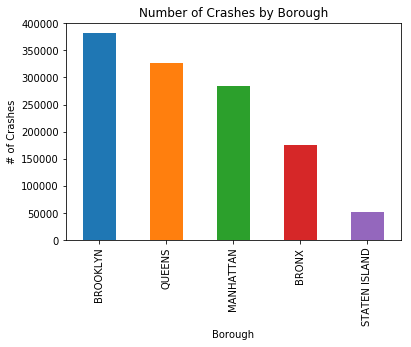

In [15]:
##bar chart of num of crashes in each borough
borough_counts = crash["borough"].value_counts()
borough_counts.plot(kind = "bar")
plt.title("Number of Crashes by Borough")
plt.xlabel("Borough")
plt.ylabel("# of Crashes")

Text(0.5,1,'Distribution of all People Killed in Crashes')

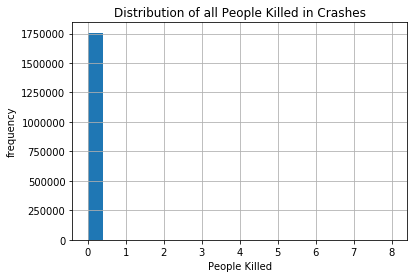

In [21]:
##hist of num ppl killed
crash["num_persons_killed"].hist(bins= 20)
plt.xlabel("People Killed")
plt.ylabel("frequency")
plt.title("Distribution of all People Killed in Crashes")

Text(0.5,1,'Distribution of all People Injured in Crashes')

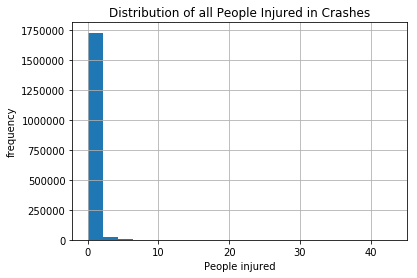

In [22]:
##hist of num ppl injured
crash["num_persons_injured"].hist(bins= 20)
plt.xlabel("People injured")
plt.ylabel("frequency")
plt.title("Distribution of all People Injured in Crashes")

Text(0,0.5,'# of Crashes')

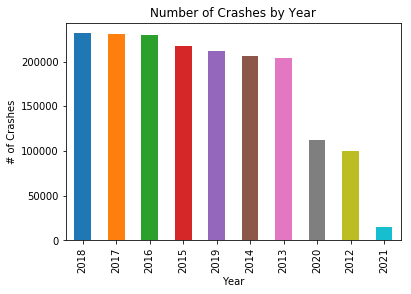

In [24]:
##bar chart of num of crashes in each year: bars are in ascending order rather than by year
year_counts = crash["date"].value_counts()
year_counts.plot(kind = "bar")
plt.title("Number of Crashes by Year")
plt.xlabel("Year")
plt.ylabel("# of Crashes")

In [45]:
year_counts

2018    231563
2017    231008
2016    229830
2015    217694
2019    211481
2014    206033
2013    203734
2020    112834
2012    100541
2021     14583
Name: date, dtype: int64

# Bi/multivariate

Text(0.5,1,'Number of People Injured per Year by Borough')

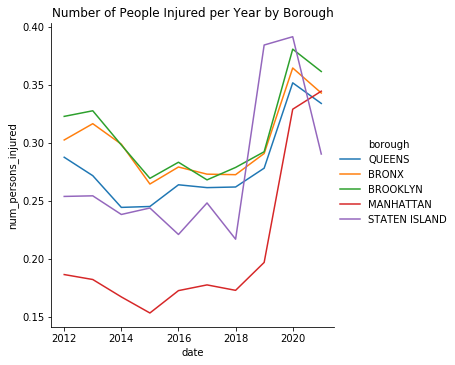

In [43]:
#line plot: injuries total by borough per year: why is the scale in the y axis less than 1?
sns.relplot(x = "date", y = "num_persons_injured", hue = "borough", kind = "line", data = crash, ci = None)
plt.title("Number of People Injured per Year by Borough")

Text(0.5,1,'Number of People Killed per Year by Borough')

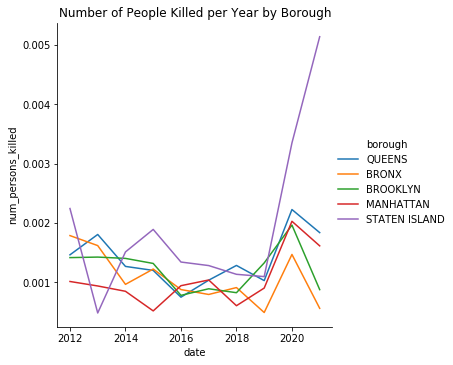

In [42]:
#line plot: deaths total by borough per year; the scale on the y axis is not right
sns.relplot(x = "date", y = "num_persons_killed", hue = "borough", kind = "line", data = crash, ci = None)
plt.title("Number of People Killed per Year by Borough")

In [44]:
len(crash)

1759301